# Projeto 3 - Gabriel Moreira e Matheus Campbell

In [2]:
from IPython.display import Image

## Introdução

O projeto 3 de Ciência dos Dados tem como objetivos estudar métodos de comparação de variáveis, tendo foco, basicamente, nas regressões múltipla e simples. Tais regressões se diferenciam apenas no fato de, na regressão múltipla, trabalharmos com mais de duas variáveis, enquanto na regressão simples trabalha-se apenas analisando duas variáveis, sendo elas a variável resposta e a variável explicativa. 
O trabalho foi dividido em três partes principais: a primeira, que consiste na escolha das variáveis para análise posterior; a segunda, no entanto, é uma parte mais teórica, na qual estudamos mais afundo tanto a regressão múltipla quanto a simples; a terceira parte é a análise das variáveis usando o Python, com gráficos e conclusões mostrados posteriormente nesse documento.

## Escolha das variáveis

#### Escolhemos as variáveis: Taxa de Fertilidade (variável resposta), Taxa de conclusão do ensino primário (variável explicativa) e  o IDH (variável explicativa)


A taxa de fertilidade (Children per Woman) é a estimativa do número
médio de filhos que as mulheres de uma determinada região tem durante o
período reprodutivo. Escolhemos essa variável resposta pois ela se relaciona
com diferentes características de diferentes países. Dentre tais
características, escolhemos o IDH (Índice de Desenvolvimento Humano) e a
taxa de crianças que completam o ensino primário. De que forma a taxa de
fertilidade impacta o IDH de alguma nação e sua taxa de conclusão do
ensino primário? Através do estudo dessas variáveis, é possível
respondermos à essa pergunta e tirarmos algumas conclusões
definitivamente importantes.


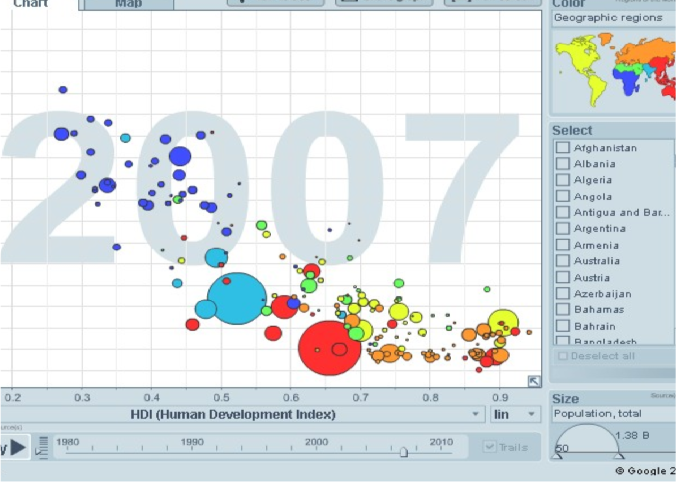

In [3]:
Image(filename='fert_idh.png')


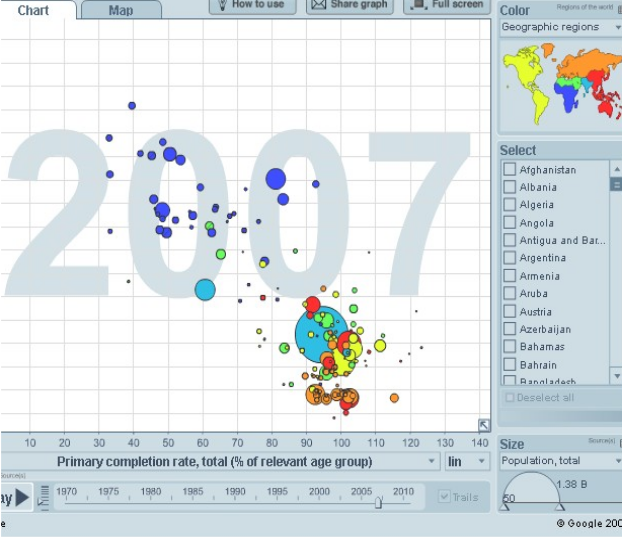

In [4]:
Image(filename='fert_taxa.png')


## PERGUNTA: Uma taxa maior de fertilidade é prejudicial ao ensino e ao IDH?

#### Imports

In [35]:
%matplotlib inline
#%matplotlib notebook
import os
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np
from matplotlib.ticker import LinearLocator

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/home/moreira/Desktop/Gabriel/Insper/2°Semestre/Ciência dos Dados/Projeto_3


In [6]:
dados = pd.read_excel('excel p3.xlsx',index_col=0)
dados.head()

,Filhos,IDH,Taxa
Países,,,
Afghanistan,6.46,0.363,NaN
Albania,1.80,0.729,NaN
Algeria,2.66,0.680,96.39509
Angola,6.52,0.471,NaN
Antigua and Barbuda,2.18,NaN,NaN


In [7]:
dadosinf = pd.read_excel('excel p3.xlsx',index_col=0)

In [8]:
dadossup = pd.read_excel('excel p3.xlsx',index_col=0)

In [9]:
dados.shape

(201, 3)

In [10]:
#Retirar NaN
dados=dados[~np.isnan(dados.Filhos)]
dados=dados[~np.isnan(dados.IDH)]
dados=dados[~np.isnan(dados.Taxa)]
dados.shape

(121, 3)

### Média e desvio padrão da Taxa de Fertilidade

In [11]:
#Média e Desvio Padrão de filhos
print('Média:',dados.Filhos.mean())
print('Desvio Padrão:',dados.Filhos.var()**1/2)

Média: 2.9469421487603302
Desvio Padrão: 1.2332765358126714


### Média e desvio padrão do IDH

In [12]:
#Média e Desvio Padrão IDH
print('Média:',dados.IDH.mean())
print('Desvio Padrão:',dados.IDH.var()**1/2)

Média: 0.6537438016528927
Desvio Padrão: 0.015070287741046828


### Média e desvio padrão da Taxa de conclusão do ensino primário

In [13]:
#Média e Desvio Padrão Taxa
print('Média:',dados.Taxa.mean())
print('Desvio Padrão:',dados.Taxa.var()**1/2)

Média: 88.42825008264462
Desvio Padrão: 174.22747429530708


### Comparando as variáveis explicativas com a variável resposta

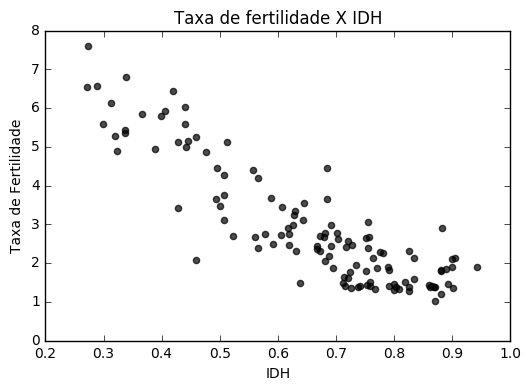

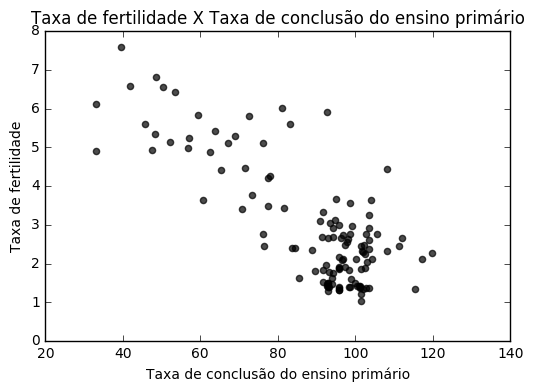

In [14]:
## TAXA DE FERTILIDADE x IDH
plt.scatter(dados.IDH, dados.Filhos, alpha=0.7, color = 'black')  # Plot the raw data
plt.title('Taxa de fertilidade X IDH')
plt.xlabel('IDH')
plt.ylabel('Taxa de Fertilidade')
plt.show()

## TAXA DE FERTILIDADE x TAXA DE CONCLUSÃO DO ENSINO PRIMÁRIO
plt.scatter(dados.Taxa, dados.Filhos, alpha=0.7, color='black')  # Plot the raw data
plt.title('Taxa de fertilidade X Taxa de conclusão do ensino primário')
plt.xlabel("Taxa de conclusão do ensino primário")
plt.ylabel("Taxa de fertilidade")



### Análise das correlações entre as variáveis

In [15]:
dados.corr(method='pearson')


,Filhos,IDH,Taxa
Filhos,1.000000,-0.882779,-0.789805
IDH,-0.882779,1.000000,0.805107
Taxa,-0.789805,0.805107,1.000000


Nota-se valores altos de correlação entre as variáveis escolhidas, sabendo que quando mais próximo de 1 (valor máximo de correlação) maior a associação entre as duas variáveis analisadas.

### Gráfico 3D das variáveis

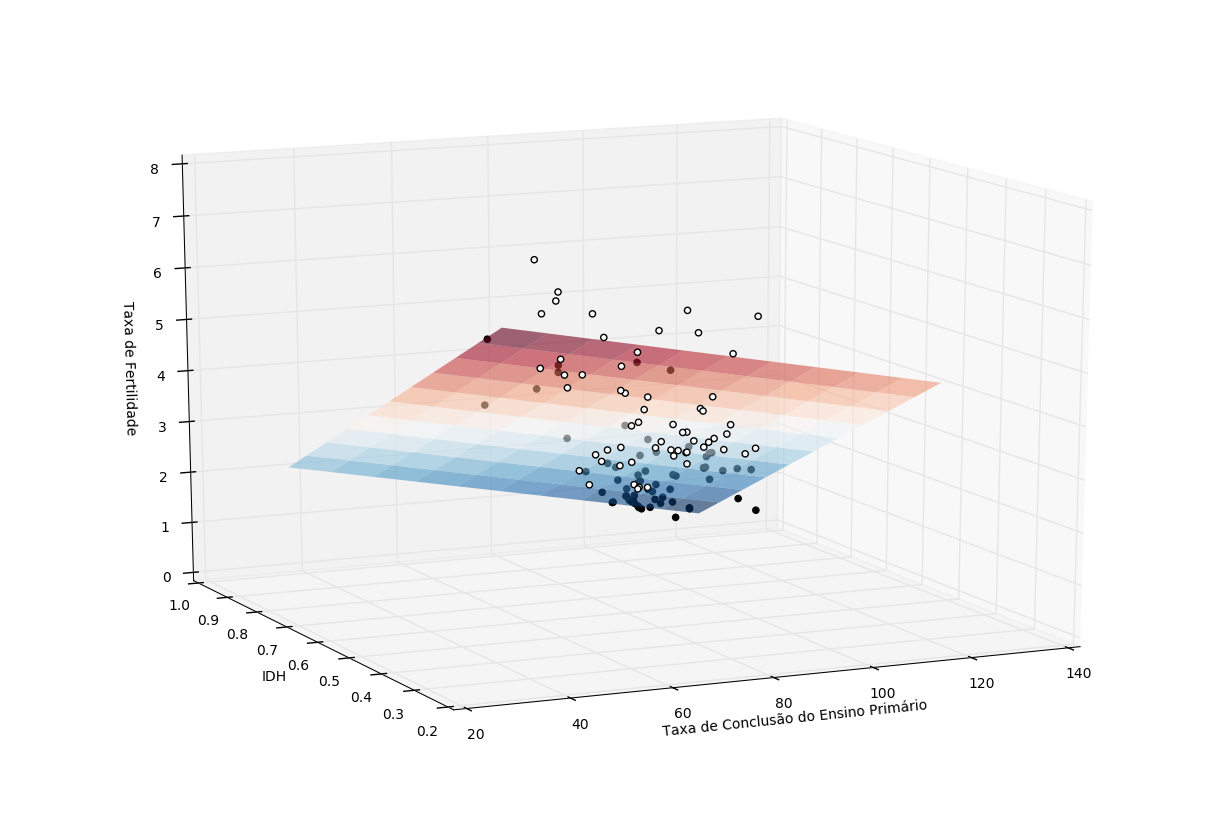

In [16]:
from mpl_toolkits.mplot3d import Axes3D

X = dados[['Taxa', 'IDH']]
y = dados['Filhos']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.Taxa.min(), X.Taxa.max(), 100), 
                       np.linspace(X.IDH.min(), X.IDH.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].Taxa, X[resid >= 0].IDH, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].Taxa, X[resid < 0].IDH, y[resid < 0], color='black', alpha=1.0)

ax.set_zlabel('Taxa de Fertilidade')
ax.set_ylabel('IDH')
ax.set_xlabel('Taxa de Conclusão do Ensino Primário')

### Regressão Linear Múltipla

In [17]:
#Regressão Linear Multipla 

y=dados.Filhos
X=dados.iloc[:,(1,2)]
X=sm1.add_constant(X)  
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Filhos   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     231.7
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           1.36e-41
Time:                        10:30:20   Log-Likelihood:                -129.32
No. Observations:                 121   AIC:                             264.6
Df Residuals:                     118   BIC:                             273.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          8.7697      0.315     27.812      0.000         8.145     9.394
IDH           -6.3488      0.632    -10.038      0.000        -7.601    -5.096
Taxa          -0.0189      0.006     -3.215      0.002        -0.031    -0.007
==============================================================================
Omnibus:                        1.648   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.300
Skew:                           0.248   Prob(JB):                        0.522
Kurtosis:                       3.113   Cond. No.                         881.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O coeficiente de determinação R é a variação explicada pelo modelo dividida pela variação total real, ou seja, 79,7% das variações reais podem ser explicadas pelo modelo proposto. Percebemos também que a relação da Taxa de Fertilidade com ambas variáveis explicativas é negativa, uma vez que seus coeficientes mostrados acima (-6,3488 e -0,0189) são menores que zero. Ou seja, quanto maior a Taxa de fertilidade, menor será o IDH e a Taxa de conclusão do ensino primário.

### Subgrupos

#### Divisão: Países com IDH elevado (maior que 0.700 ), Países com baixo IDH (menor que 0.555) e Países com IDH médio(entre 0.555 e 0.777)

 Escolhemos trabalhar com tais subgrupos pois e

In [18]:
div_1 = 0.700
div_2 = 0.555

In [19]:
group = pd.read_excel('excel p3.xlsx',index_col=0)


In [20]:
#Retirar NaN
group=group[~np.isnan(group.Filhos)]
group=group[~np.isnan(group.IDH)]
group=group[~np.isnan(group.Taxa)]


## Criando DafaFrame com IDH<=0.555 -  índice baixo 

In [21]:
group_1 = pd.DataFrame()
group_1['Filhos']=group[group.IDH <= div_2].Filhos
group_1['Taxa']=group[group.IDH <= div_2].Taxa
group_1['IDH']=group[group.IDH <= div_2].IDH


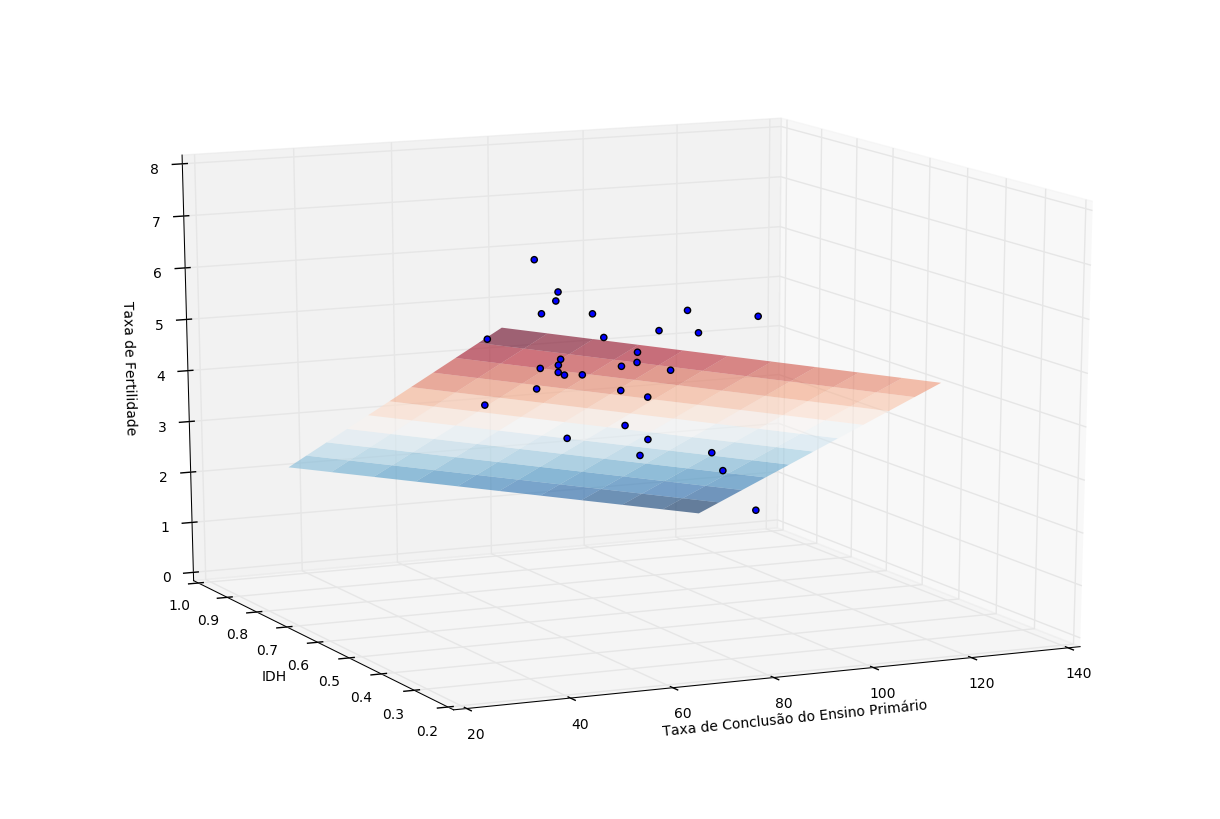

In [22]:
from mpl_toolkits.mplot3d import Axes3D

X = dados[['Taxa', 'IDH']]
y = dados['Filhos']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.Taxa.min(), X.Taxa.max(), 100), 
                       np.linspace(X.IDH.min(), X.IDH.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(group_1.Taxa, group_1.IDH, group_1.Filhos, color='black', alpha=1.0, facecolor='blue')
#ax.scatter(group_2.Taxa, group_2.IDH, group_2.Filhos, color='black', alpha=1.0, facecolor ='red')

ax.set_zlabel('Taxa de Fertilidade')
ax.set_ylabel('IDH')
ax.set_xlabel('Taxa de Conclusão do Ensino Primário')

## Criando DafaFrame com IDH>=0.700 - índice elevado e muito elevado

In [23]:
group_2 = pd.DataFrame()
group_2['Filhos']=group[group.IDH >= div_1].Filhos
group_2['Taxa']=group[group.IDH >= div_1].Taxa
group_2['IDH']=group[group.IDH >= div_1].IDH


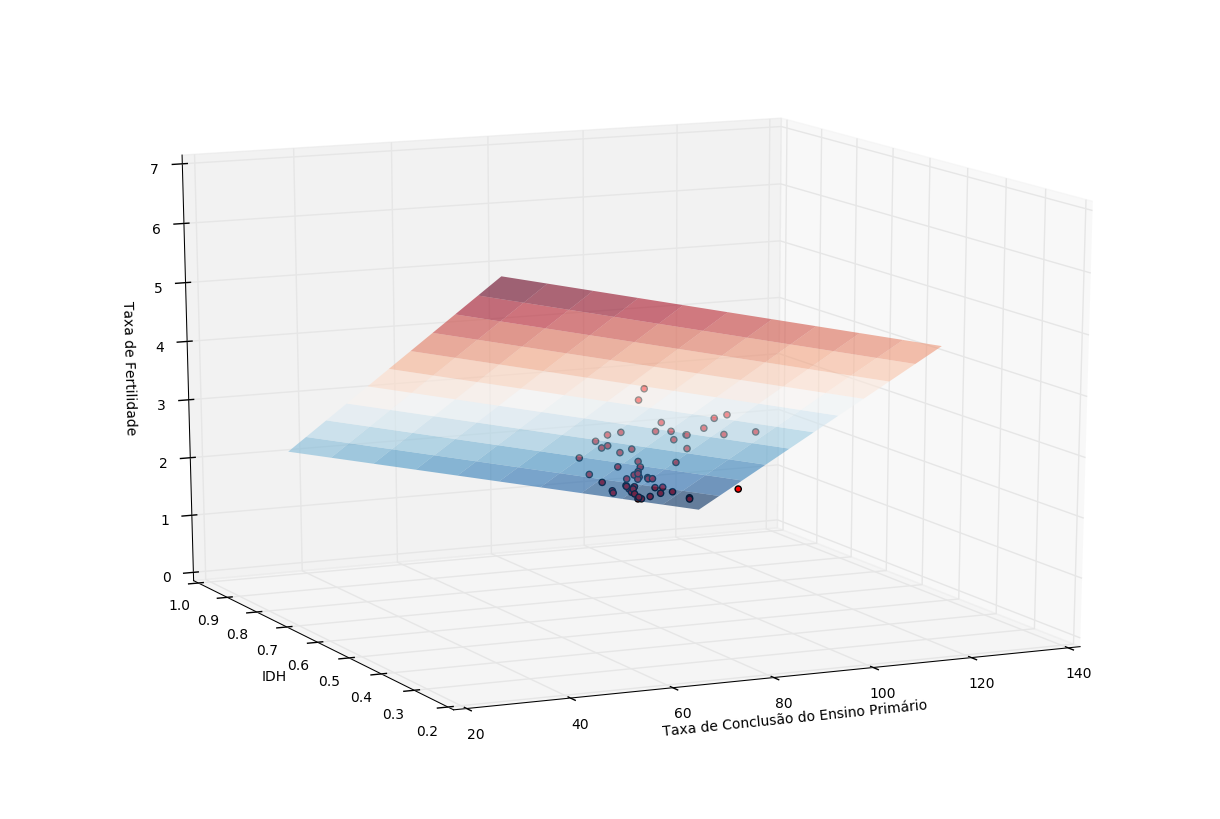

In [24]:
from mpl_toolkits.mplot3d import Axes3D

X = dados[['Taxa', 'IDH']]
y = dados['Filhos']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.Taxa.min(), X.Taxa.max(), 100), 
                       np.linspace(X.IDH.min(), X.IDH.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
#ax.scatter(group_1.Taxa, group_1.IDH, group_1.Filhos, color='black', alpha=1.0, facecolor='blue')
ax.scatter(group_2.Taxa, group_2.IDH, group_2.Filhos, color='black', alpha=1.0, facecolor ='red')

ax.set_zlabel('Taxa de Fertilidade')
ax.set_ylabel('IDH')
ax.set_xlabel('Taxa de Conclusão do Ensino Primário')

## Criando DafaFrame com 0.700>IDH>0.555 - índice médio

In [25]:
group_3 = pd.DataFrame()
group_3['Filhos']=group[(group.IDH < div_1) & (group.IDH > div_2)].Filhos
group_3['Taxa']=group[(group.IDH < div_1) & (group.IDH > div_2)].Taxa
group_3['IDH']=group[(group.IDH < div_1) & (group.IDH > div_2)].IDH


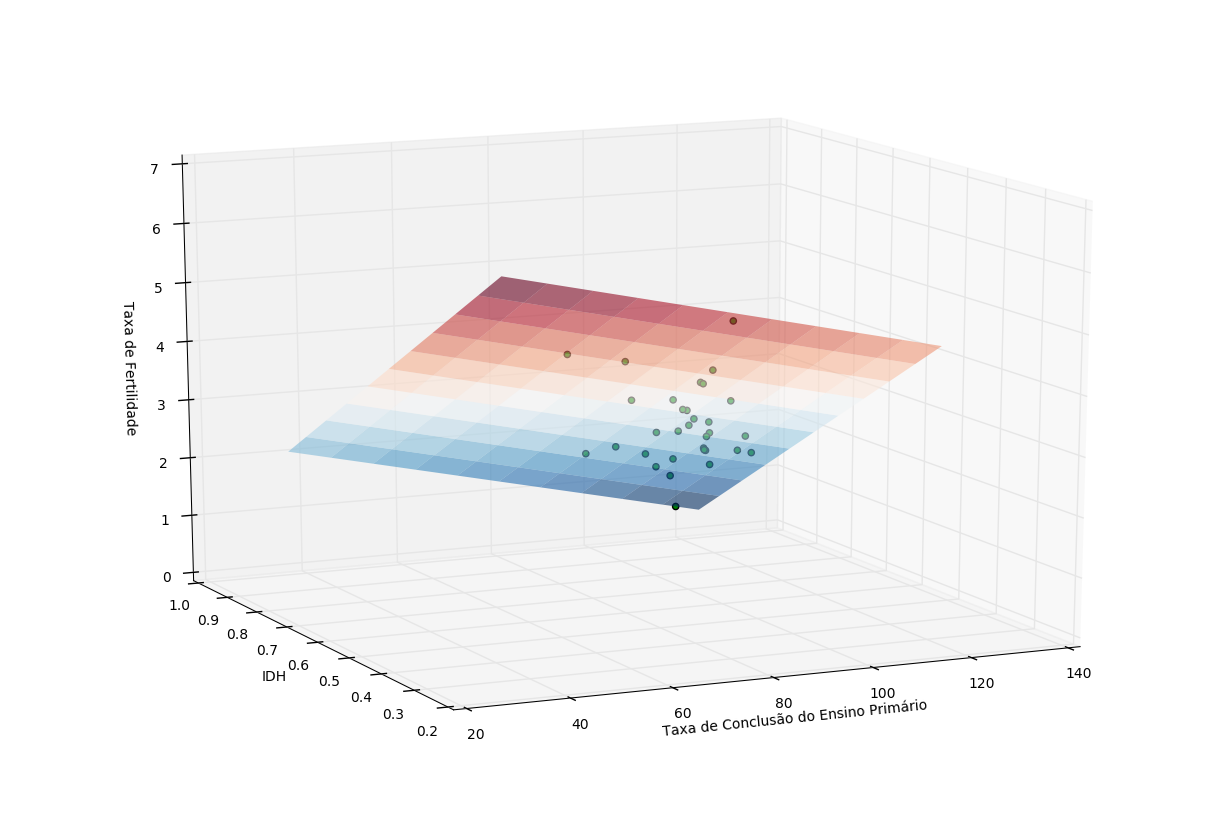

In [26]:
from mpl_toolkits.mplot3d import Axes3D

X = dados[['Taxa', 'IDH']]
y = dados['Filhos']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.Taxa.min(), X.Taxa.max(), 100), 
                       np.linspace(X.IDH.min(), X.IDH.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(group_3.Taxa, group_3.IDH, group_3.Filhos, color='black', alpha=1.0, facecolor='green')
ax.set_zlabel('Taxa de Fertilidade')
ax.set_ylabel('IDH')
ax.set_xlabel('Taxa de Conclusão do Ensino Primário')

### Gráfico 3D com os subgrupos

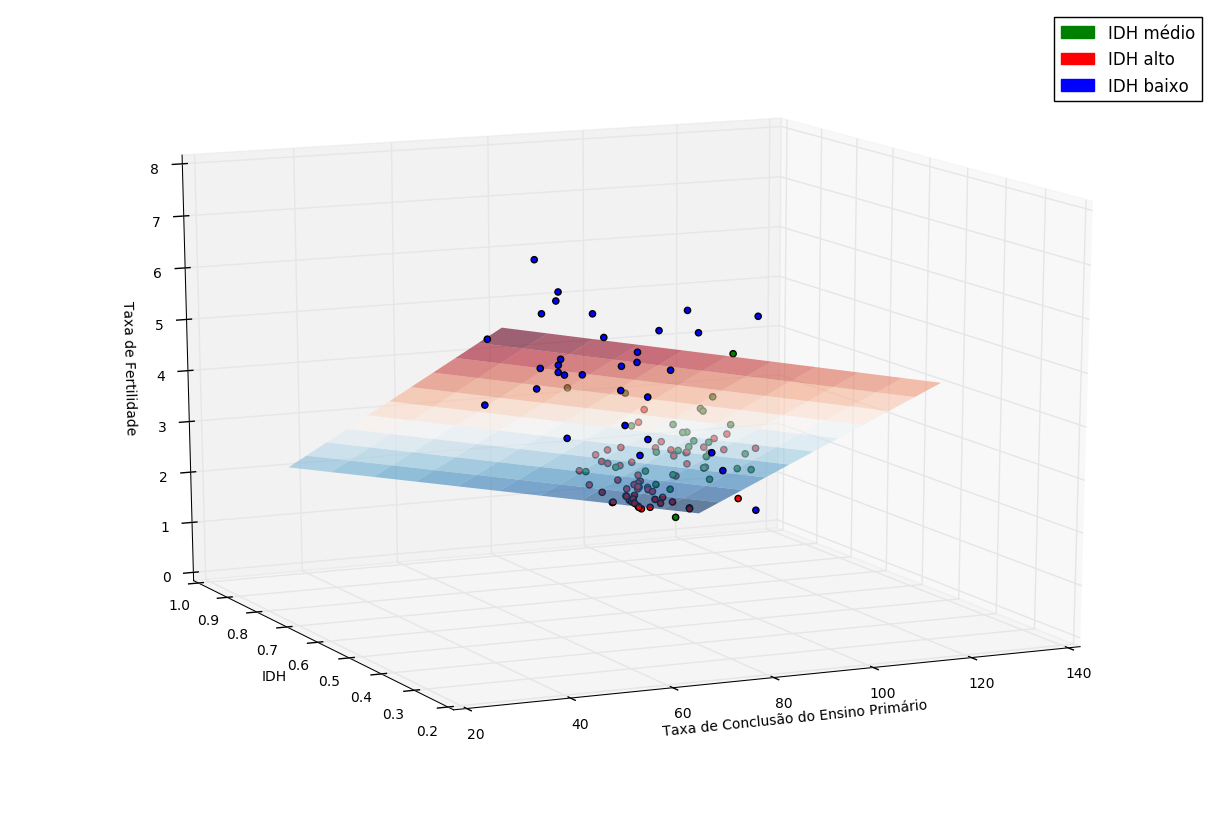

In [43]:
from mpl_toolkits.mplot3d import Axes3D

X = dados[['Taxa', 'IDH']]
y = dados['Filhos']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.Taxa.min(), X.Taxa.max(), 100), 
                       np.linspace(X.IDH.min(), X.IDH.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(group_1.Taxa, group_1.IDH, group_1.Filhos, color='black', alpha=1.0, facecolor='blue')
ax.scatter(group_2.Taxa, group_2.IDH, group_2.Filhos, color='black', alpha=1.0, facecolor ='red')
ax.scatter(group_3.Taxa, group_3.IDH, group_3.Filhos, color='black', alpha=1.0, facecolor='green')


red_patch = mpatches.Patch(color='red', label='IDH alto')
green_patch = mpatches.Patch(color='green', label='IDH médio')
blue_patch = mpatches.Patch(color='blue', label='IDH baixo')

plt.legend(handles=[green_patch,red_patch,blue_patch])
ax.set_zlabel('Taxa de Fertilidade')
ax.set_ylabel('IDH')
ax.set_xlabel('Taxa de Conclusão do Ensino Primário')